# Uncorrelated data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("uncorrelated_data.csv", low_memory = False)
data.shape

(52490, 15)

In [3]:
#data.columns
data.mean()

Index(['date', 'BS:PI-0016-060-B__PV_RW', 'BS:PI-0018-030-B__PV_RW',
       'BS:PI-0017-031-A__PV_RW', 'BS:PI-0020-060-B__PV_RW',
       'BS:PI-0022-050-B__PV_RW', 'BS:PI-0019-050-B__PV_RW',
       'BS:PI-0021-050-B__PV_RW', 'BS:PI-0019-030-B__PV_RW',
       'BS:PI-0020-050-B__PV_RW', 'BS:PI-0022-031-A__PV_RW',
       'BS:PI-0022-030-B__PV_RW', 'BS:PI-0017-050-B__PV_RW',
       'BS:PI-0021-032-A__PV_RW', 'BS:PI-0020-030-B__PV_RW'],
      dtype='object')

In [5]:
col = data['BS:PI-0018-030-B__PV_RW']
col.min(), col.max()

(0.0, 215.00077819999996)

In [6]:
to_drop = ['BS:PI-0021-050-B__PV_RW']
data.drop(to_drop, axis = 1, inplace = True)

# Seasonality analysis of raw data

In [7]:
data['datetime'] = pd.to_datetime(data['date'])
data = data.set_index('datetime')
data = data.drop('date', axis = 1)
data = data.sort_index()

In [8]:
data['Year'] = data.index.year
data['Month'] = data.index.month
#data1['Weekday Name'] = data1.index.weekday_name


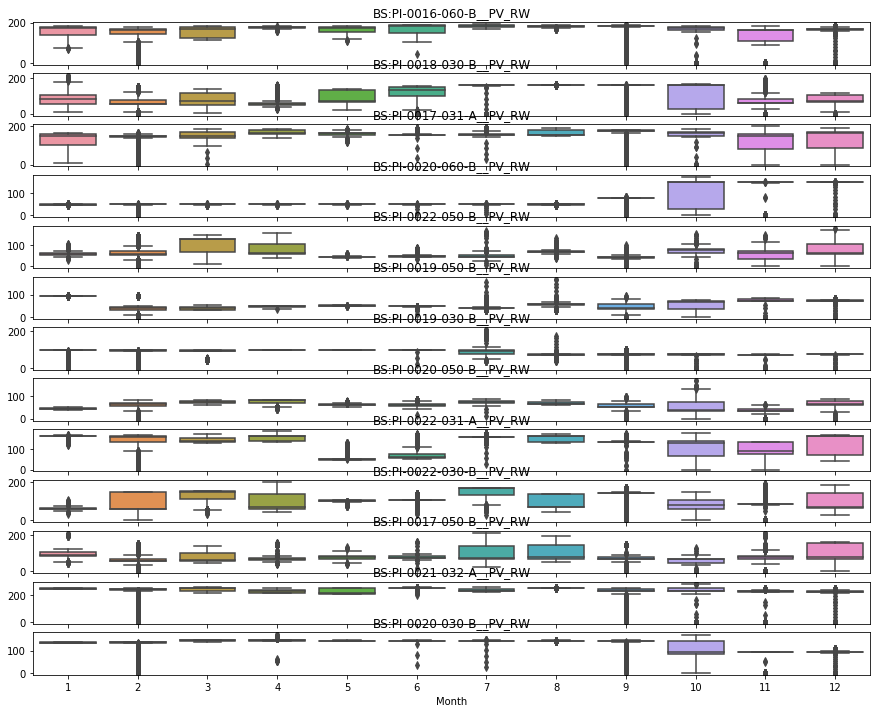

In [8]:
fig, axes = plt.subplots(13, 1, figsize = (15, 12), sharex = True)
for name, ax in zip(data.columns, axes):
    sns.boxplot(data = data, x = 'Month', y = name, ax = ax)
    ax.set_ylabel('')
    ax.set_title(name)
    ax.set_xlabel('')
    if ax == axes[-1]:
        ax.set_xlabel('Month')

# Raw data distribution

In [10]:
data = pd.read_csv("uncorrelated_data.csv", low_memory = False)
to_drop = ['date']
data.drop(to_drop, axis = 1, inplace = True)

In [11]:
to_drop = ['BS:PI-0021-050-B__PV_RW']
data.drop(to_drop, axis = 1, inplace = True)

C:\Users\Ranja.Sarkar\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Ranja.Sarkar\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


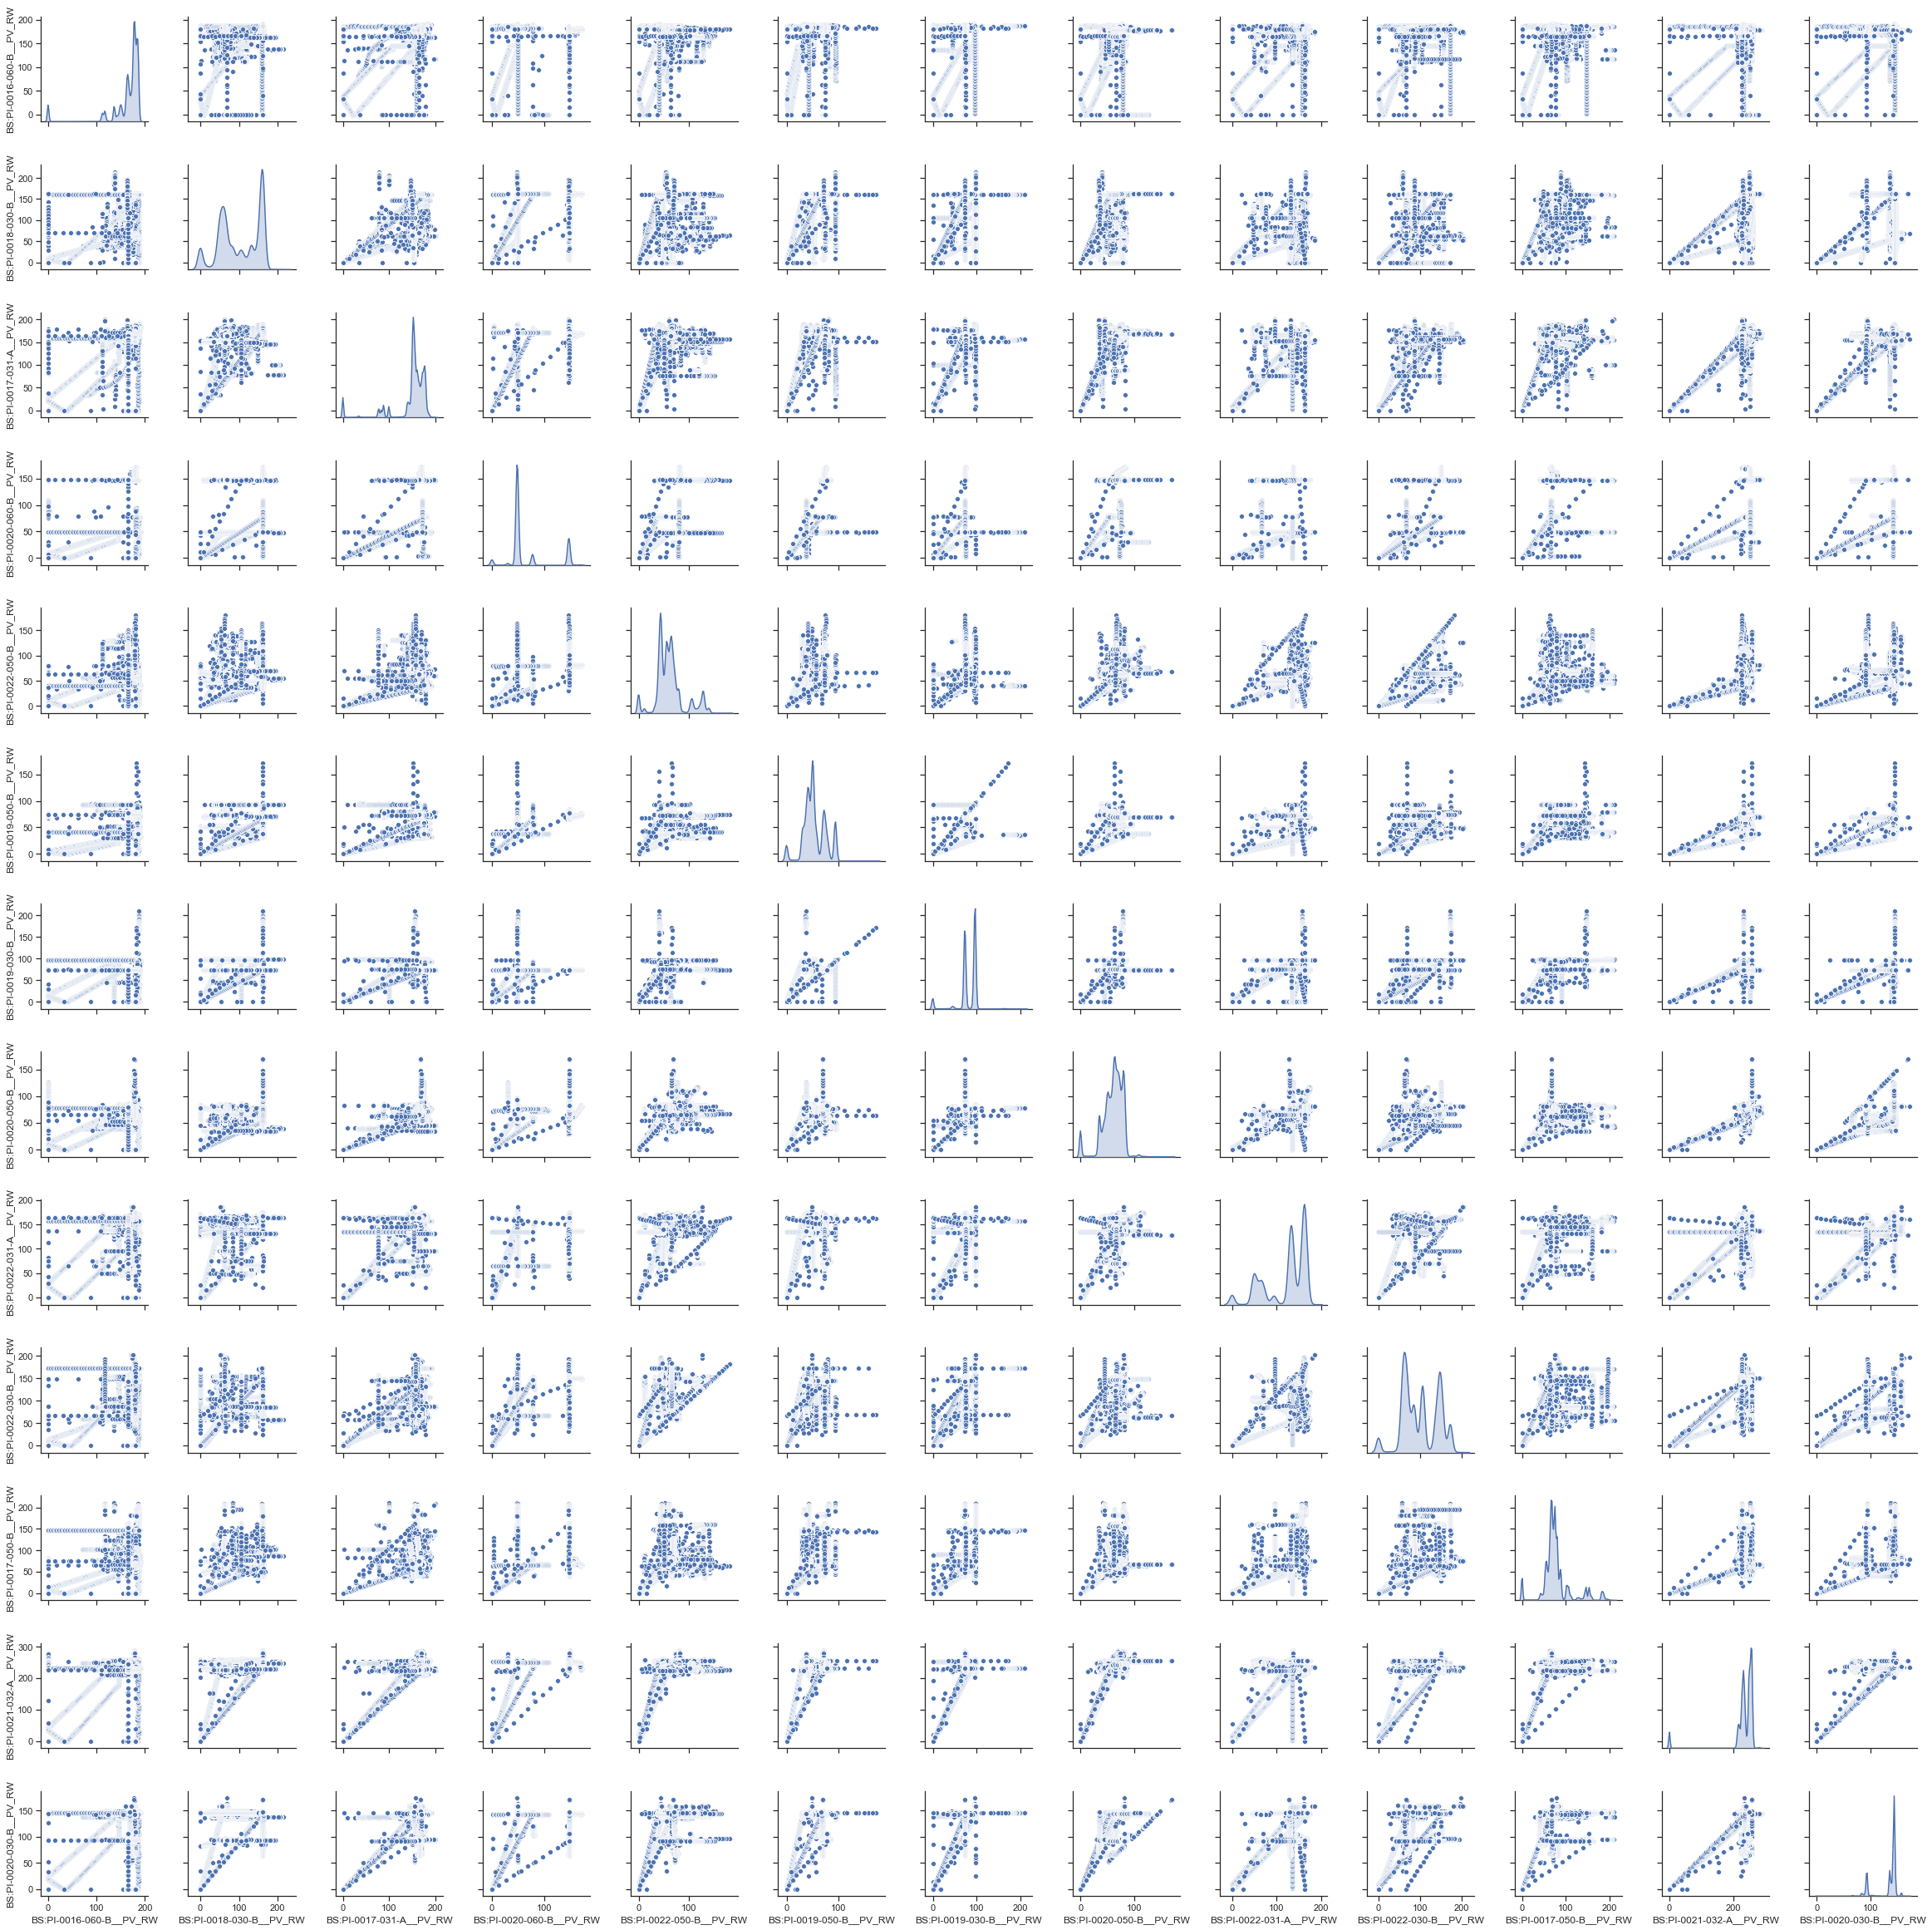

In [9]:
sns.set(style = "ticks", color_codes = True)
sns.pairplot(data, diag_kind = 'kde')

# Decomposition/Transformation

In [12]:
mu = []
for n in data.mean():
#    print(n)
    mu.append(n)

#desired mean values
m = np.array(mu)
print(m)

[163.17398095 100.92920687 148.15822652  67.52072515  61.88173027
  53.38003949  81.35903281  60.53476251 122.74794297 100.46049428
  78.22460996 231.39168715 128.74754929]


In [13]:
coV = data.corr()

In [14]:
np.random.seed(1)
y = np.random.multivariate_normal(m, coV, size = len(data))

In [15]:
df = pd.DataFrame(y)
#df.to_csv('NormalSample_uncorrelated.csv')

In [16]:
df.mean()

0     163.168204
1     100.928602
2     148.153735
3      67.521894
4      61.877794
5      53.372666
6      81.353424
7      60.534682
8     122.749399
9     100.467019
10     78.223702
11    231.384999
12    128.741400
dtype: float64

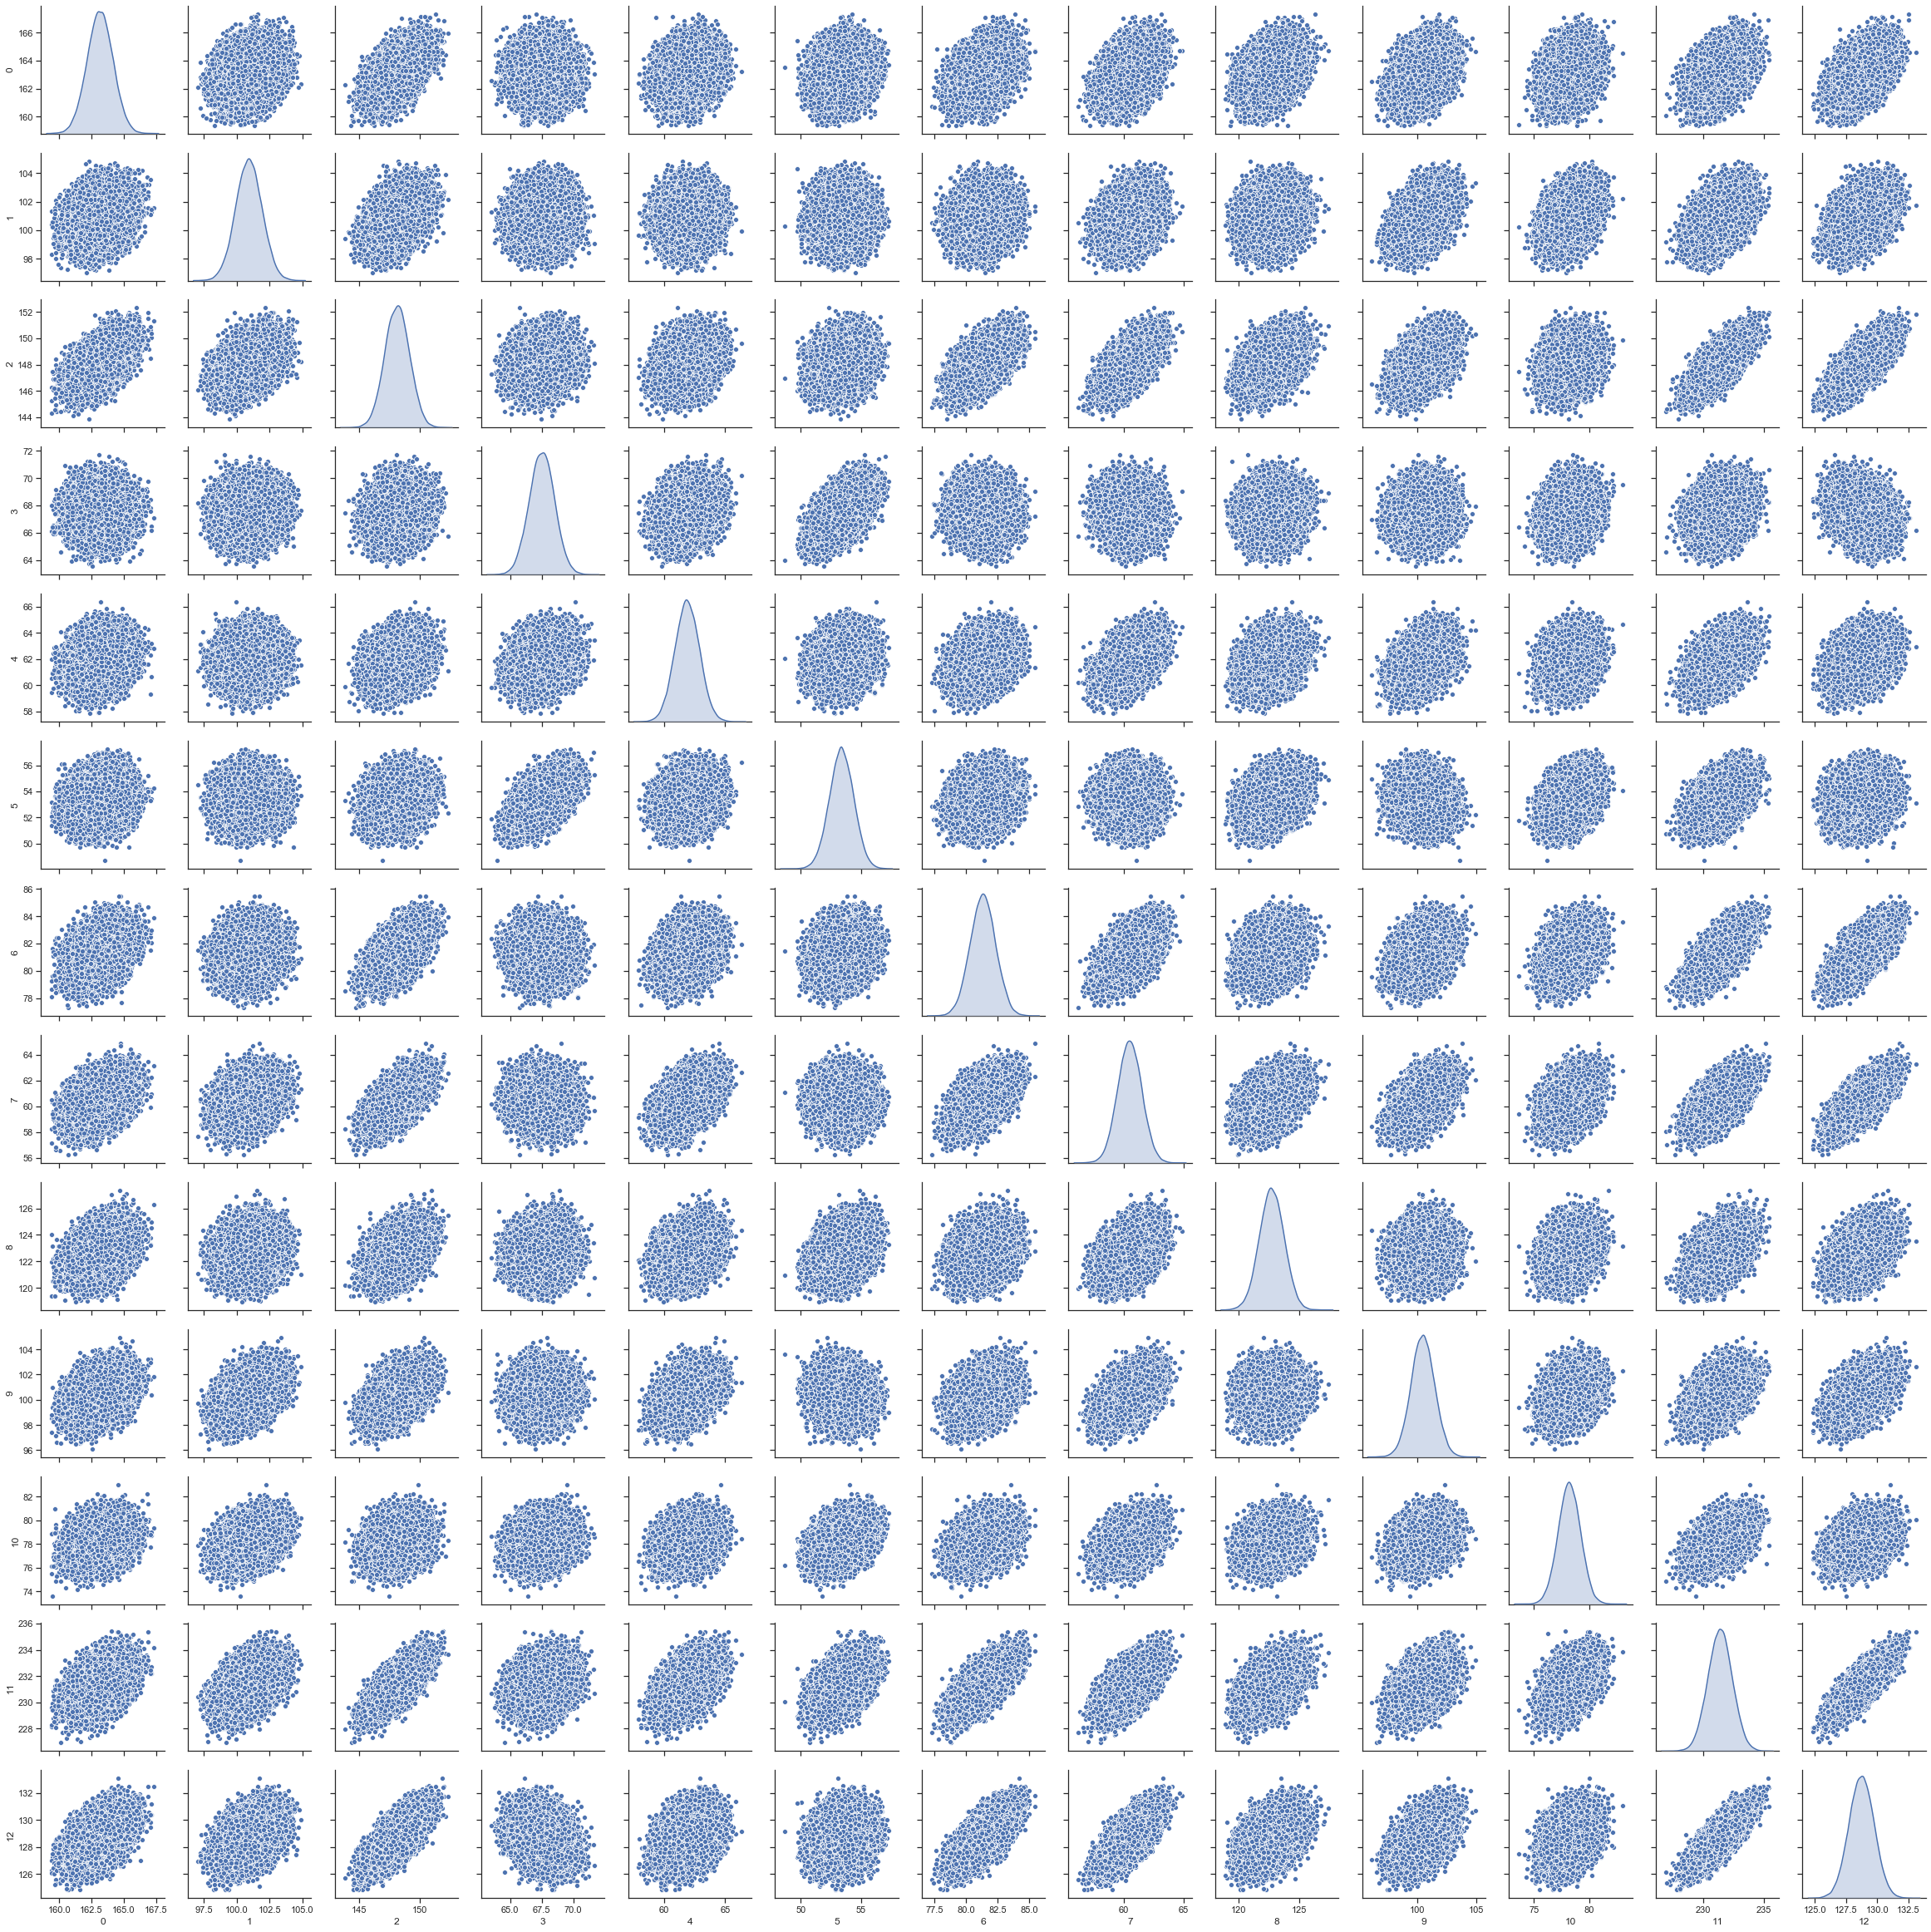

In [15]:
sns.pairplot(df, diag_kind = 'kde')

# Seasonality analysis of transformed variables

In [17]:
df = pd.read_csv("NormalSample_uncorrelated.csv", low_memory = False)

In [18]:
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df = df.drop('date', axis = 1)
df = df.sort_index()

In [19]:
df['Year'] = df.index.year
df['Month'] = df.index.month

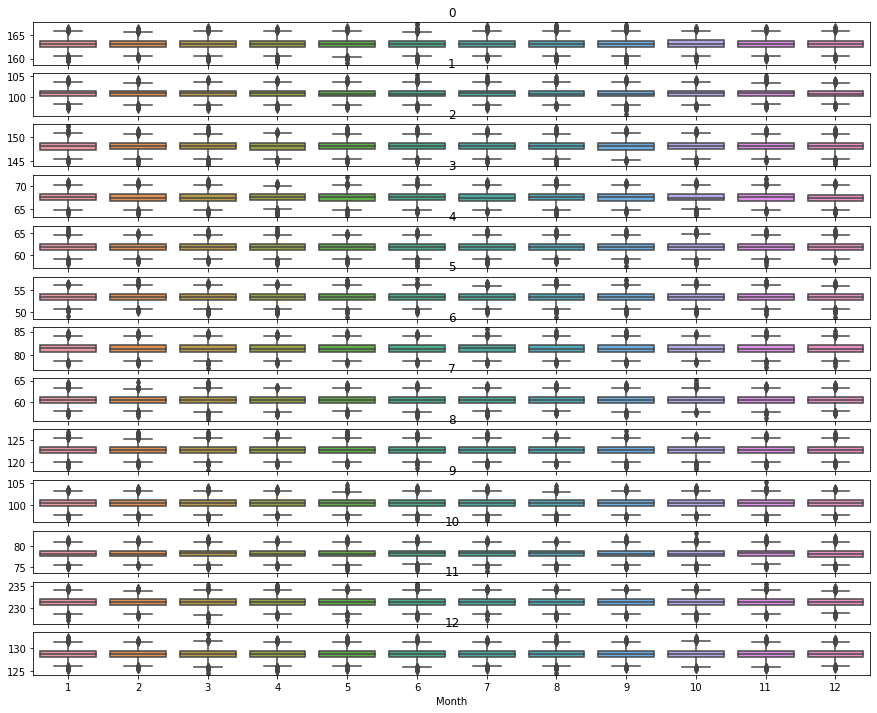

In [20]:
fig, axes = plt.subplots(13, 1, figsize = (15, 12), sharex = True)
for name, ax in zip(df.columns, axes):
    sns.boxplot(data = df, x = 'Month', y = name, ax = ax)
    ax.set_ylabel('')
    ax.set_title(name)
    ax.set_xlabel('')
    if ax == axes[-1]:
        ax.set_xlabel('Month')

In [21]:
col = df['1']
col.min(), col.max()

(96.07823505, 105.2923838)